In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def derive(n,x,y):
    return -n*(y**(n-1))*np.exp(-y)+(y**n)*exp(-y)
def obj(f0,n,x,y):
    return f0*(x**n)*np.exp(-x) - (y**n)*np.exp(-y)
def newton_raphson(f0,n,x,guess):
    y=guess
    tol=1e-10  
    f=tol*10
    it=0
    while (abs(f)>tol): 
        it=it+1
        df = derive(n,x,y)
        f  = obj(f0,n,x,y)
        y = y - f/df
        
        #if (np.isnan(y)): raise IOError, 'is nan'
        if (it>100): raise IOError, 'Diverged.'
    return y
def xy_curve(n=0.25,f0=0.999):
    x=np.linspace(0.00,n,100)
    y=[]
    for i in xrange(len(x)):
        #print 'i:',i
        if i==0: guess=x[i]
        elif i>0: 
            guess = y[i-1]+0.0001 ## small tweak 
            # print 'guess:',guess
        guess=newton_raphson(f0,n,x[i],guess)
        y.append(guess)
    y=np.array(y)
    return x,y

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


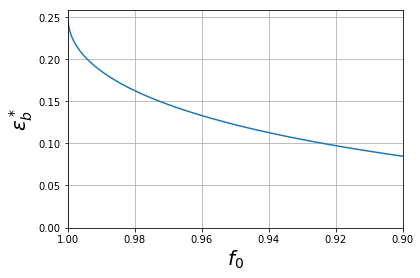

In [3]:
n=0.25

fs=np.linspace(1,0.9,500)
ax=gca()
vals=[]
for i in xrange(len(fs)):
    x,y=xy_curve(n,fs[i])
    strain_at_instability = y[-1]
    vals.append(strain_at_instability)
    
ax.plot(fs,vals,'-')

## deco
ax.set_xlim(1,0.9)
ax.set_ylim(0.,)
ax.set_xlabel(r'$f_0$',fontsize=20)
ax.set_ylabel(r'$\varepsilon_b^*$',fontsize=20)
ax.grid()


Fig 4-8은 위를 잘 활용하여...

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


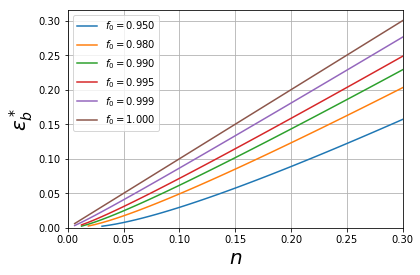

In [4]:
def fig4_8(n=0.25,fs=0.9):
    x,y=xy_curve(n,fs)
    return y[-1]

fs=[0.950, 0.980,0.990,0.995,0.999,1]
ns=np.linspace(0.0,0.30)
ax=gca()

for i in xrange(len(fs)):
    y=[]
    for j in xrange(len(ns)):
        ypoint=fig4_8(ns[j],fs[i])
        y.append(ypoint)
    ax.plot(ns,y,label=r'$f_0=%.3f$'%fs[i])

ax.set_xlim(0,0.3)
ax.set_ylim(0.,)
ax.set_xlabel(r'$n$',fontsize=20)
ax.set_ylabel(r'$\varepsilon_b^*$',fontsize=20)
ax.legend()
ax.grid()